# Airlines Passenger Prediction using RNN - LSTM

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from sklearn.preprocessing import MinMaxScaler

In [85]:
df = pd.read_csv("https://raw.githubusercontent.com/rahulhegde99/Time-Series-Analysis-and-Forecasting-of-Air-Passengers/refs/heads/master/airpassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [86]:
df.columns

Index(['Month', '#Passengers'], dtype='object')

In [87]:
df = df.rename(columns={'#Passengers': 'Passengers'})
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [88]:
dataset = df['Passengers']
dataset.head()

0    112
1    118
2    132
3    129
4    121
Name: Passengers, dtype: int64

In [89]:
dataset = np.array(dataset).reshape(-1,1)
dataset[:5]

array([[112],
       [118],
       [132],
       [129],
       [121]])

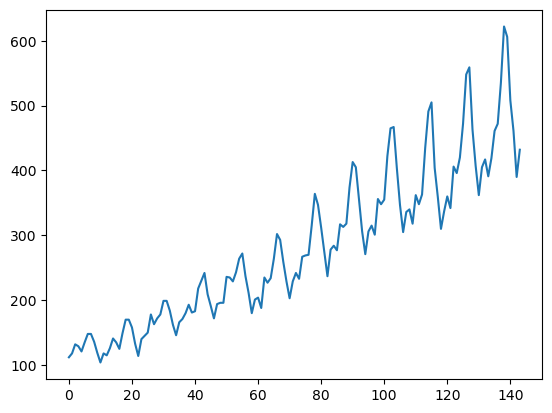

In [90]:
plt.plot(dataset)

In [91]:
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
dataset[:5]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853]])

In [92]:
min(dataset), max(dataset)

(array([0.]), array([1.]))

In [93]:
train_size = 100
test_size = 44

In [94]:
train = dataset[0:train_size, :]
train.shape

(100, 1)

In [95]:
test = dataset[train_size:144, :]
test.shape

(44, 1)

### Build Trainin and Testing Datasets

In [96]:
def get_data(dataset, look_back):

    data_X, data_Y = [], []

    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        data_X.append(a)
        data_Y.append(dataset[i+look_back, 0])
    return np.array(data_X), np.array(data_Y)


In [97]:
look_back = 1
X_train, y_train = get_data(train, look_back)

In [98]:
X_train.shape

(98, 1)

In [99]:
X_train

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [100]:
y_train

array([0.02702703, 0.05405405, 0.04826255, 0.03281853, 0.05984556,
       0.08494208, 0.08494208, 0.06177606, 0.02895753, 0.        ,
       0.02702703, 0.02123552, 0.04247104, 0.07142857, 0.05984556,
       0.04054054, 0.08687259, 0.12741313, 0.12741313, 0.1042471 ,
       0.05598456, 0.01930502, 0.06949807, 0.07915058, 0.08880309,
       0.14285714, 0.11389961, 0.13127413, 0.14285714, 0.18339768,
       0.18339768, 0.15444015, 0.11196911, 0.08108108, 0.11969112,
       0.12934363, 0.14671815, 0.17181467, 0.14864865, 0.15250965,
       0.22007722, 0.24324324, 0.26640927, 0.2027027 , 0.16795367,
       0.13127413, 0.17374517, 0.17760618, 0.17760618, 0.25482625,
       0.25289575, 0.24131274, 0.26833977, 0.30888031, 0.32432432,
       0.25675676, 0.20656371, 0.14671815, 0.18725869, 0.19305019,
       0.16216216, 0.25289575, 0.23745174, 0.25096525, 0.30888031,
       0.38223938, 0.36486486, 0.2992278 , 0.24131274, 0.19111969,
       0.24131274, 0.26640927, 0.24903475, 0.31467181, 0.31853

In [101]:
X_test, y_test = get_data(test, look_back)

In [102]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [103]:
X_train.shape

(98, 1, 1)

### Build The Model

In [104]:
model = Sequential()

model.add(LSTM(5, input_shape=(1, look_back)))
model.add(Dense(1))

model.compile(
    optimizer='adam',
    loss='mean_squared_error'
    )
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

In [105]:
epochs=50
batch_size=1

model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size= batch_size
)

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - loss: 0.0557
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 0.0309
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0154
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.0173
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 0.0161
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 555us/step - loss: 0.0145   
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 0.0119
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.0125
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step - loss: 0.0104
Epoch 10/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.0071
Epoch 11/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - loss: 0.0131
Epoch 12/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 551us/step - loss: 0.0082   
Epoch 13/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step - loss: 0.0080
Epoch 14/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step - loss: 0.0059   
Epoch 15/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 608us/st

In [106]:
y_pred = model.predict(X_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x13b945080> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


In [107]:
y_pred = np.array(y_pred)
y_test = np.array(y_test)

y_test = y_test.reshape(-1,1)
y_pred = y_pred.reshape(-1,1)

y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

In [108]:
y_pred

array([[347.69464],
       [408.73764],
       [446.0304 ],
       [447.72513],
       [392.66425],
       [340.20532],
       [300.37067],
       [329.8505 ],
       [333.6231 ],
       [312.78046],
       [354.21698],
       [341.14346],
       [355.1463 ],
       [420.18097],
       [467.77606],
       [479.2252 ],
       [392.66425],
       [351.42532],
       [305.15076],
       [330.7944 ],
       [352.35648],
       [335.50644],
       [394.46286],
       [385.43878],
       [406.96466],
       [451.9461 ],
       [513.2336 ],
       [521.6521 ],
       [444.332  ],
       [395.36102],
       [354.21698],
       [393.56393],
       [404.299  ],
       [380.89844],
       [406.07693],
       [442.63004],
       [451.94608],
       [503.1367 ],
       [567.6866 ],
       [556.3431 ],
       [481.6546 ],
       [442.63004]], dtype=float32)

In [109]:
y_test

array([[422.],
       [465.],
       [467.],
       [404.],
       [347.],
       [305.],
       [336.],
       [340.],
       [318.],
       [362.],
       [348.],
       [363.],
       [435.],
       [491.],
       [505.],
       [404.],
       [359.],
       [310.],
       [337.],
       [360.],
       [342.],
       [406.],
       [396.],
       [420.],
       [472.],
       [548.],
       [559.],
       [463.],
       [407.],
       [362.],
       [405.],
       [417.],
       [391.],
       [419.],
       [461.],
       [472.],
       [535.],
       [622.],
       [606.],
       [508.],
       [461.],
       [390.]])

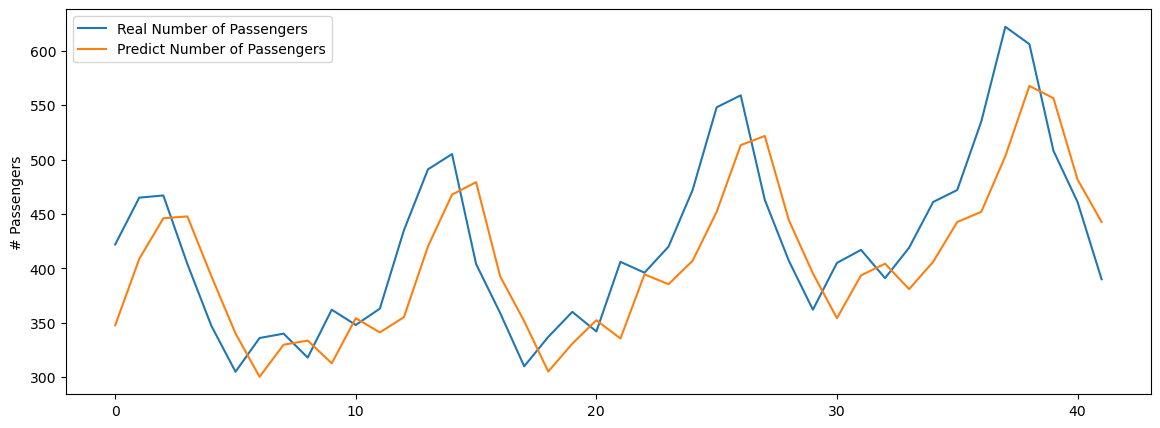

In [110]:
plt.figure(figsize=(14,5))
plt.plot(y_test, label= 'Real Number of Passengers')
plt.plot(y_pred, label= 'Predict Number of Passengers')
plt.ylabel('# Passengers')
plt.legend()
plt.show()